In [1]:
from ucimlrepo import fetch_ucirepo 

  
# fetch dataset 
census_income = fetch_ucirepo(id=20) 
  
# data (as pandas dataframes) 
X = census_income.data.features 
y = census_income.data.targets 
  
# metadata 
print(census_income.metadata) 
  
# variable information 
print(census_income.variables) 


{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Sep 09 2024', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [2]:
# print size of dataset
print(X.shape)

(48842, 14)


In [3]:
data = census_income

In [4]:
import pandas as pd
# Combine features and target into a single DataFrame for easier analysis
data = pd.concat([X, y], axis=1)

In [5]:
data["income"].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [6]:
# Remove trailing periods in the 'income' column to standardize the labels
data['income'] = data['income'].str.strip().replace({'<=50K.': '<=50K', '>50K.': '>50K'})

# Check the updated counts of the 'income' column
print("Updated Income Counts:")
print(data['income'].value_counts())


Updated Income Counts:
income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [8]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [9]:
# Drop rows with missing values (if necessary)
data.dropna(inplace=True)

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47621 non-null  int64 
 1   workclass       47621 non-null  object
 2   fnlwgt          47621 non-null  int64 
 3   education       47621 non-null  object
 4   education-num   47621 non-null  int64 
 5   marital-status  47621 non-null  object
 6   occupation      47621 non-null  object
 7   relationship    47621 non-null  object
 8   race            47621 non-null  object
 9   sex             47621 non-null  object
 10  capital-gain    47621 non-null  int64 
 11  capital-loss    47621 non-null  int64 
 12  hours-per-week  47621 non-null  int64 
 13  native-country  47621 non-null  object
 14  income          47621 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB
None


In [11]:
print("\nDescriptive Statistics for Numerical Features:")
print(data.describe())


Descriptive Statistics for Numerical Features:
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  47621.000000  4.762100e+04   47621.000000  47621.000000  47621.000000   
mean      38.640684  1.897271e+05      10.090821   1091.137649     87.853489   
std       13.558961  1.055695e+05       2.568320   7487.228336    404.010612   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175840e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.782820e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.377200e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    47621.000000  
mean        40.600050  
std         12.260345  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [12]:
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    print(f"\n{feature} Value Counts:")
    print(data[feature].value_counts())


workclass Value Counts:
workclass
Private             33717
Self-emp-not-inc     3838
Local-gov            3126
State-gov            1965
?                    1836
Self-emp-inc         1688
Federal-gov          1423
Without-pay            21
Never-worked            7
Name: count, dtype: int64

education Value Counts:
education
HS-grad         15444
Some-college    10512
Bachelors        7881
Masters          2610
Assoc-voc        2034
11th             1746
Assoc-acdm       1566
10th             1336
7th-8th           912
Prof-school       819
9th               735
12th              633
Doctorate         582
5th-6th           494
1st-4th           239
Preschool          78
Name: count, dtype: int64

marital-status Value Counts:
marital-status
Married-civ-spouse       21966
Never-married            15555
Divorced                  6526
Separated                 1497
Widowed                   1443
Married-spouse-absent      600
Married-AF-spouse           34
Name: count, dtype: int64

occ

In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# List of categorical features to encode
categorical_features = [
    'workclass', 'education', 'marital-status', 
    'occupation', 'relationship', 'race', 
    'sex', 'native-country', 'income'
]

# Apply Label Encoding to each categorical column
for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature])

# Display the first few rows of the encoded dataset
print("Dataset after Label Encoding:")
print(data.head())


Dataset after Label Encoding:
   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0             0   
2           6             1     4    1             0             0   
3           6             0     2    1             0             0   
4          10             5     2    0             0             0   

   hours-per-week  native-country  income  
0              40              39       0  
1              13              39 

In [14]:
data.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,47621.000000,47621.000000,4.762100e+04,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000
mean,38.640684,3.946893,1.897271e+05,10.290040,10.090821,2.606602,6.704395,1.432141,3.671489,0.670650,1091.137649,87.853489,40.600050,36.946284,0.242351
std,13.558961,1.371859,1.055695e+05,3.856378,2.568320,1.505946,4.168429,1.601278,0.842198,0.469982,7487.228336,404.010612,12.260345,7.311473,0.428510
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.175840e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.782820e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.377200e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.490400e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_3556\3419870333.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=data, palette='Set2')


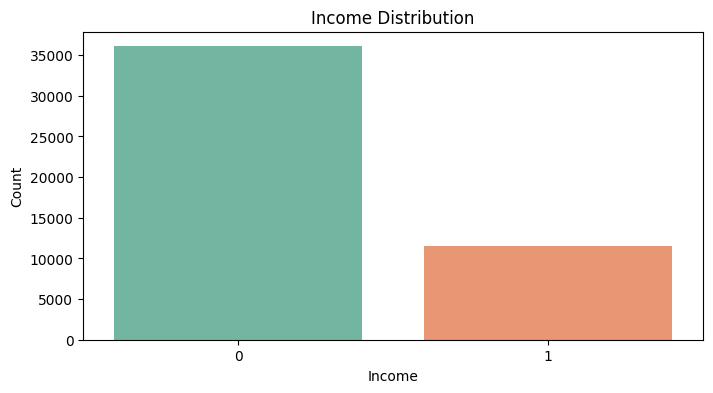

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 4))
sns.countplot(x='income', data=data, palette='Set2')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


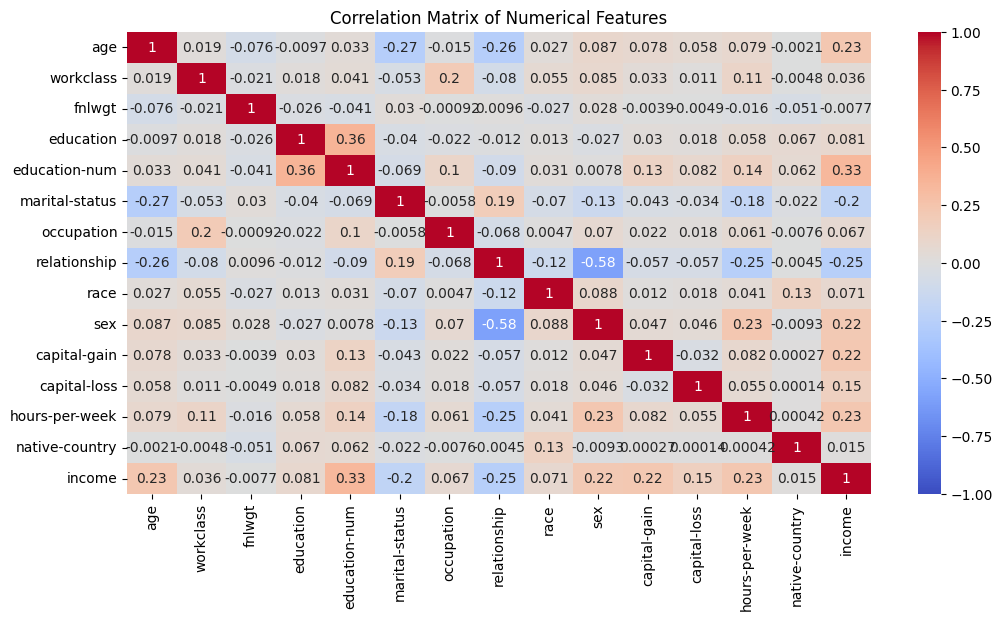

In [16]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

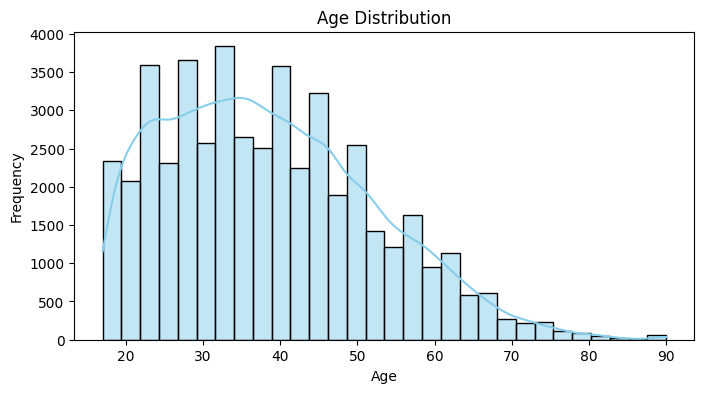

In [17]:
# Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


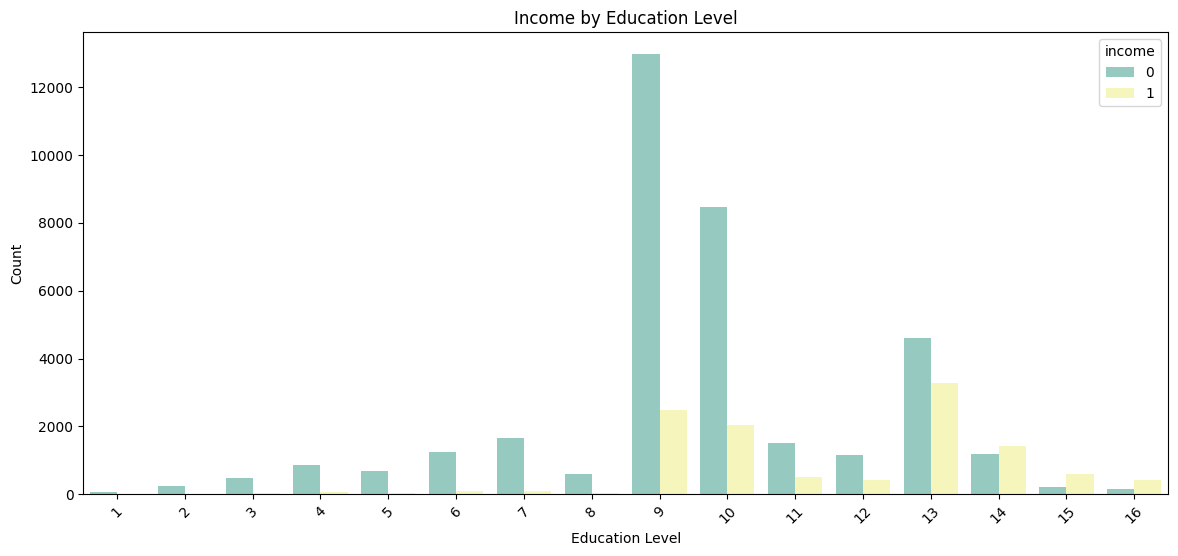

In [18]:
# Relationship between education level and income
plt.figure(figsize=(14, 6))
sns.countplot(x='education-num', hue='income', data=data, palette='Set3')
plt.xticks(rotation=45)
plt.title('Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

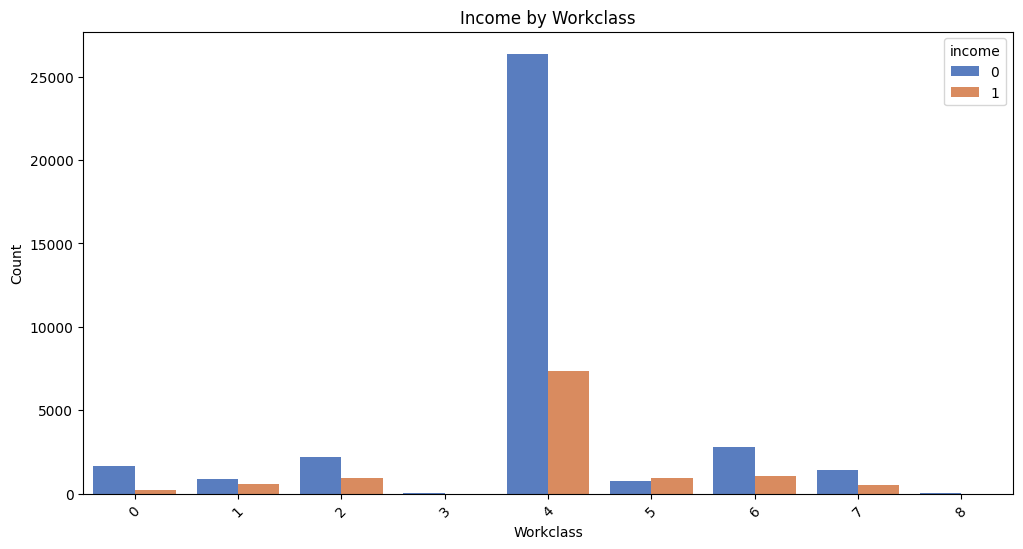

In [19]:
# Visualize workclass vs income
plt.figure(figsize=(12, 6))
sns.countplot(x='workclass', hue='income', data=data, palette='muted')
plt.xticks(rotation=45)
plt.title('Income by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()


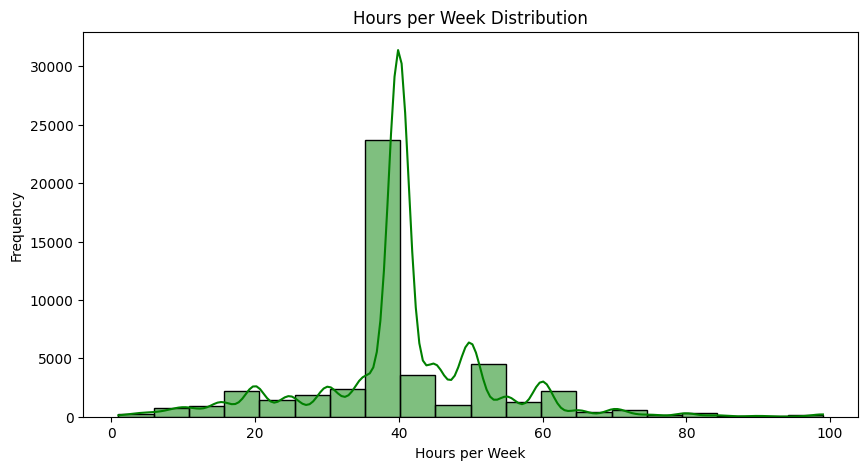

In [20]:
# Hours-per-week distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['hours-per-week'], bins=20, kde=True, color='green')
plt.title('Hours per Week Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()


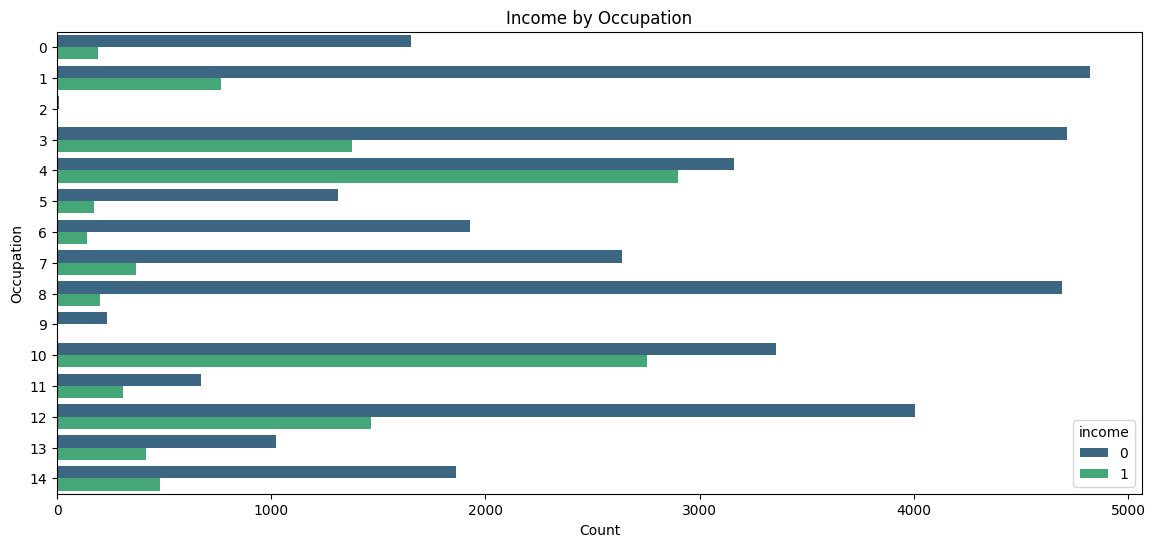

In [21]:
# Visualize occupation vs income
plt.figure(figsize=(14, 6))
sns.countplot(y='occupation', hue='income', data=data, palette='viridis')
plt.title('Income by Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_3556\3959209375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='age', data=data, palette='Set1', ax=ax[0])
C:\Users\user\AppData\Local\Temp\ipykernel_3556\3959209375.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='hours-per-week', data=data, palette='Set2', ax=ax[1])


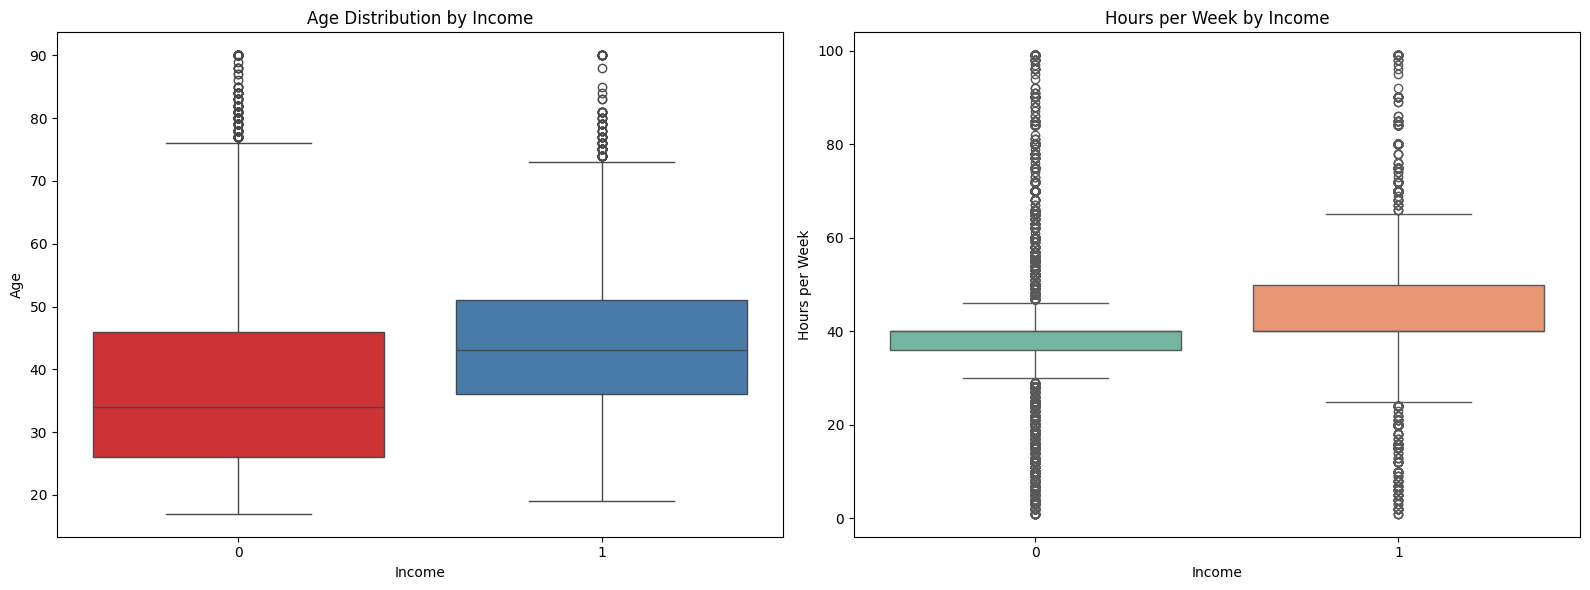

In [22]:
# Boxplot for detecting outliers in 'age' and 'hours-per-week' by income level
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x='income', y='age', data=data, palette='Set1', ax=ax[0])
ax[0].set_title('Age Distribution by Income')
ax[0].set_xlabel('Income')
ax[0].set_ylabel('Age')

sns.boxplot(x='income', y='hours-per-week', data=data, palette='Set2', ax=ax[1])
ax[1].set_title('Hours per Week by Income')
ax[1].set_xlabel('Income')
ax[1].set_ylabel('Hours per Week')
plt.tight_layout()
plt.show()

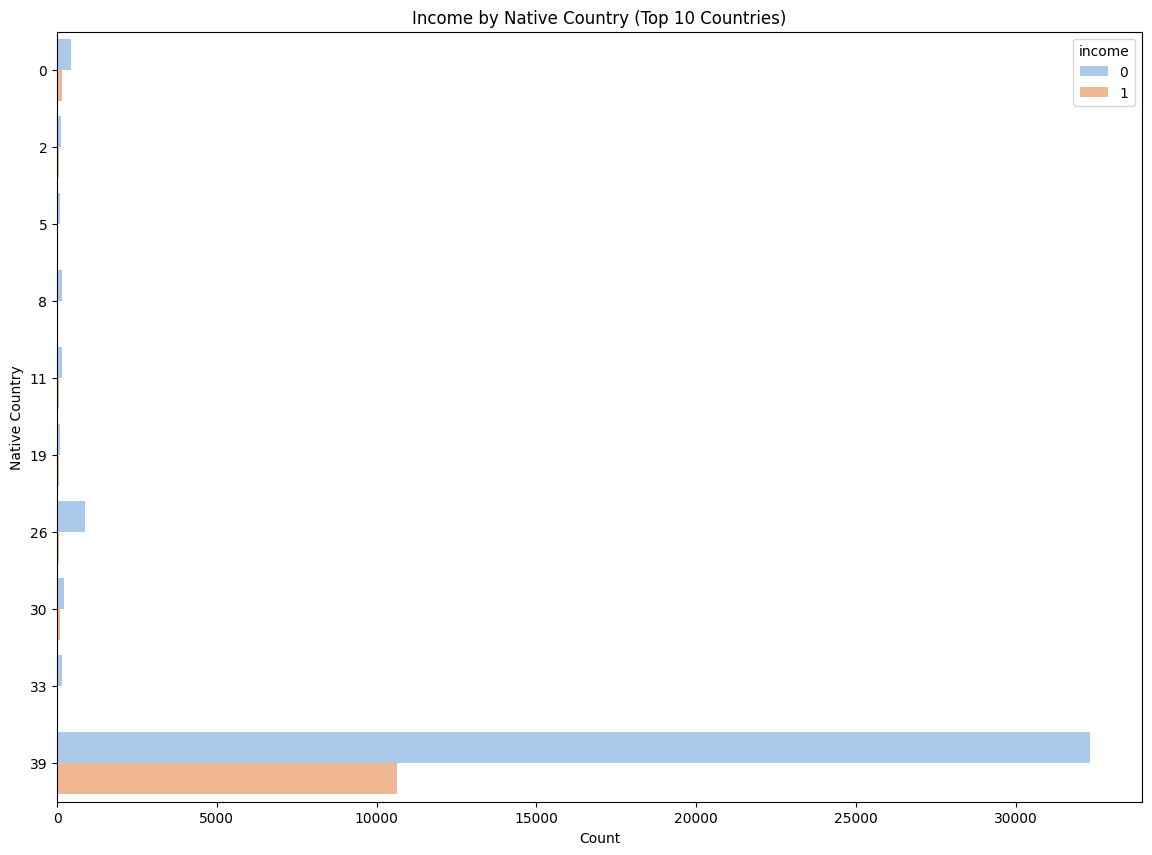

In [23]:

# Relationship between native-country and income
plt.figure(figsize=(14, 10))
top_countries = data['native-country'].value_counts().nlargest(10).index
sns.countplot(y='native-country', hue='income', data=data[data['native-country'].isin(top_countries)], palette='pastel')
plt.title('Income by Native Country (Top 10 Countries)')
plt.xlabel('Count')
plt.ylabel('Native Country')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_3556\3677735678.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y=feature, data=data, ax=axes[row][col], palette='Set3')
C:\Users\user\AppData\Local\Temp\ipykernel_3556\3677735678.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y=feature, data=data, ax=axes[row][col], palette='Set3')
C:\Users\user\AppData\Local\Temp\ipykernel_3556\3677735678.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y=feature, data=data, ax=axes[row][col], palette='Set3')
C:\U

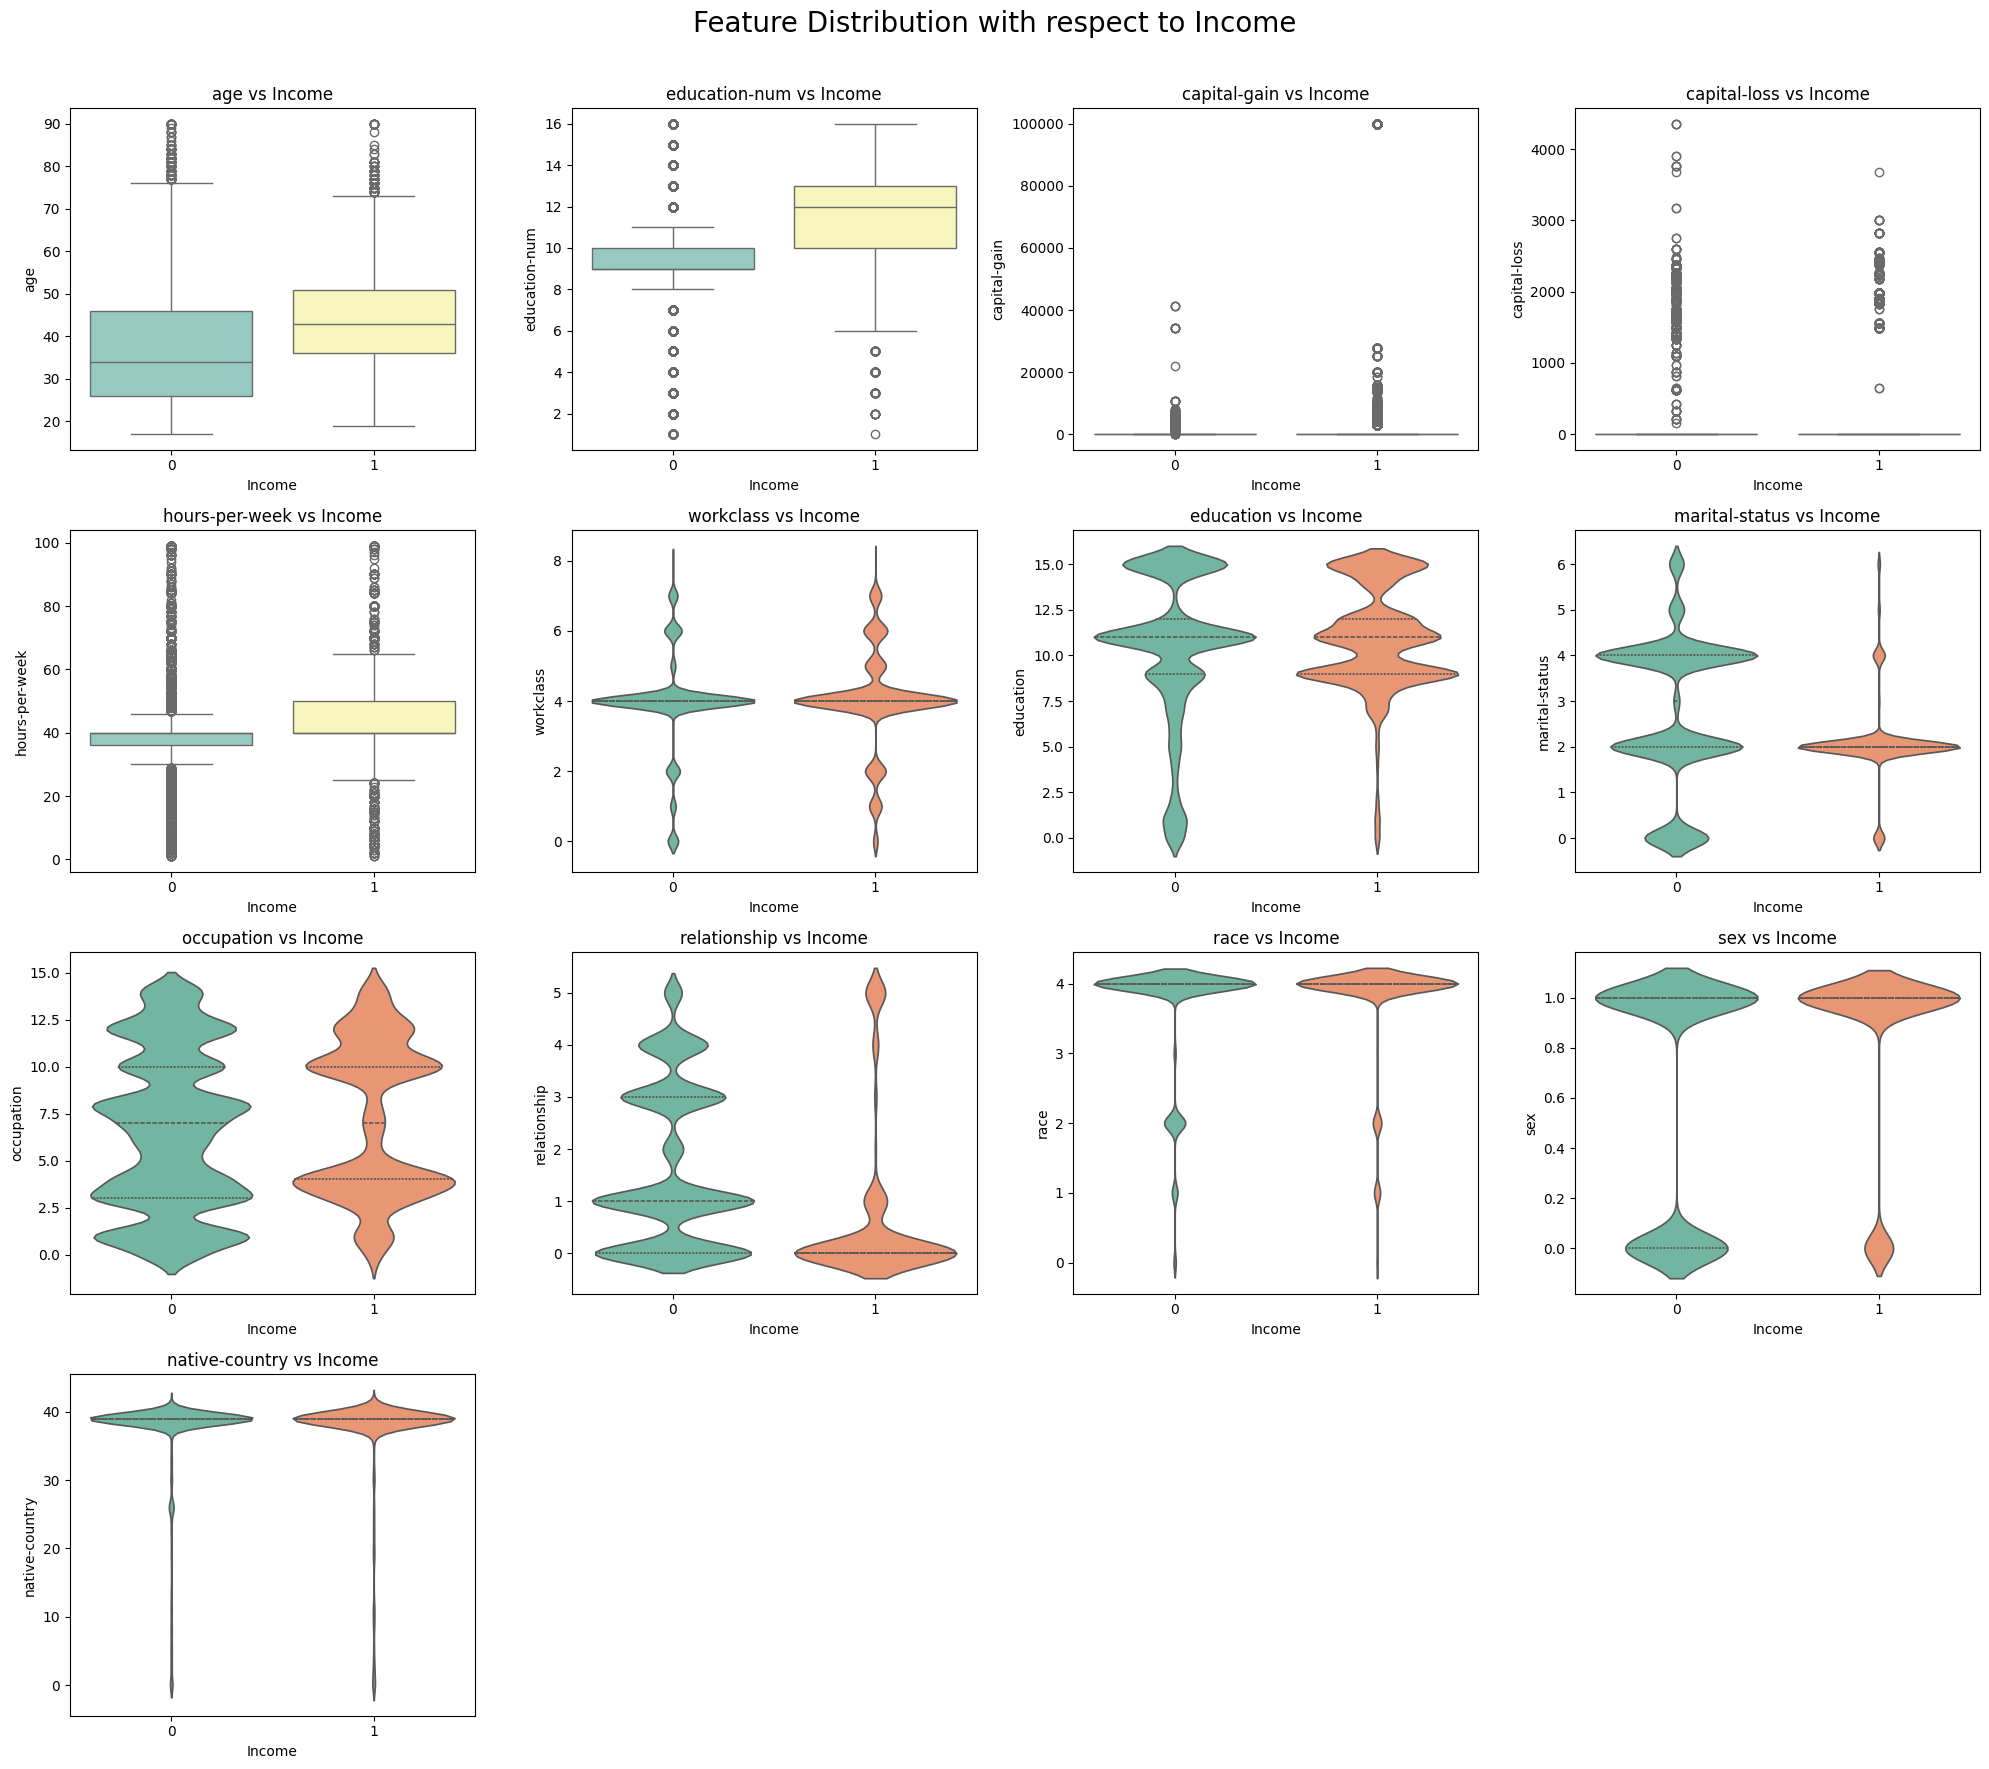

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
fig, axes = plt.subplots(4, 4, figsize=(20, 18))
fig.suptitle('Feature Distribution with respect to Income', fontsize=20)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Numeric features with respect to income (Boxplots)
numeric_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for idx, feature in enumerate(numeric_features):
    row, col = divmod(idx, 4)
    sns.boxplot(x='income', y=feature, data=data, ax=axes[row][col], palette='Set3')
    axes[row][col].set_title(f'{feature} vs Income')
    axes[row][col].set_xlabel('Income')
    axes[row][col].set_ylabel(feature)

# Categorical features with respect to income (Violin plots)
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for idx, feature in enumerate(categorical_features):
    row, col = divmod(idx + len(numeric_features), 4)
    sns.violinplot(x='income', y=feature, data=data, ax=axes[row][col], palette='Set2', inner='quartile')
    axes[row][col].set_title(f'{feature} vs Income')
    axes[row][col].set_xlabel('Income')
    axes[row][col].set_ylabel(feature)

# Hide any unused subplots
for i in range(len(numeric_features) + len(categorical_features), 16):
    fig.delaxes(axes[i // 4][i % 4])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [25]:
# Drop the 'education' feature from the dataset
data.drop(columns=['education'], inplace=True)

# Display the first few rows of the updated dataset to confirm the change
print("Dataset after dropping 'education' feature:")
print(data.head())

Dataset after dropping 'education' feature:
   age  workclass  fnlwgt  education-num  marital-status  occupation  \
0   39          7   77516             13               4           1   
1   50          6   83311             13               2           4   
2   38          4  215646              9               0           6   
3   53          4  234721              7               2           6   
4   28          4  338409             13               2          10   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0             1     4    1          2174             0              40   
1             0     4    1             0             0              13   
2             1     4    1             0             0              40   
3             0     2    1             0             0              40   
4             5     2    0             0             0              40   

   native-country  income  
0              39       0  
1              39     

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the data for standard scaling
data_standard_scaled = data.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
data_standard_scaled[numeric_features] = scaler.fit_transform(data_standard_scaled[numeric_features])

# Display the first few rows of the scaled dataset
print("Dataset after Standard Scaling:")
print(data_standard_scaled.head())
# Create a copy of the data for min-max scaling
data_min_max_scaled = data.copy()

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the numerical features
data_min_max_scaled[numeric_features] = min_max_scaler.fit_transform(data_min_max_scaled[numeric_features])

# Display the first few rows of the min-max scaled dataset
print("Dataset after Min-Max Scaling:")
print(data_min_max_scaled.head())

Dataset after Standard Scaling:
        age  workclass  fnlwgt  education-num  marital-status  occupation  \
0  0.026501          7   77516       1.132729               4           1   
1  0.837781          6   83311       1.132729               2           4   
2 -0.047252          4  215646      -0.424726               0           6   
3  1.059039          4  234721      -1.203454               2           6   
4 -0.784780          4  338409       1.132729               2          10   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0             1     4    1      0.144629     -0.217456       -0.048943   
1             0     4    1     -0.145735     -0.217456       -2.251188   
2             1     4    1     -0.145735     -0.217456       -0.048943   
3             0     2    1     -0.145735     -0.217456       -0.048943   
4             5     2    0     -0.145735     -0.217456       -0.048943   

   native-country  income  
0              39       0  
1   

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

features_to_exclude = ['race', 'sex']
X_model_standard_scaled = data_standard_scaled.drop(columns=features_to_exclude + ['income'])
y_model_standard_scaled = data_standard_scaled['income']

# Split the standard scaled data into training and testing sets
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_model_standard_scaled, y_model_standard_scaled, test_size=0.2, random_state=42)

# Logistic Regression on standard scaled data

log_reg_std = LogisticRegression(max_iter=1000)
log_reg_std.fit(X_train_std, y_train_std)
y_pred_log_reg_std = log_reg_std.predict(X_test_std)

print("Logistic Regression Results on Standard Scaled Data:")
print("Accuracy:", accuracy_score(y_test_std, y_pred_log_reg_std))
print(classification_report(y_test_std, y_pred_log_reg_std))

# Decision Tree Classifier on standard scaled data
decision_tree_std = DecisionTreeClassifier(random_state=42)
decision_tree_std.fit(X_train_std, y_train_std)
y_pred_decision_tree_std = decision_tree_std.predict(X_test_std)

print("Decision Tree Results on Standard Scaled Data:")
print("Accuracy:", accuracy_score(y_test_std, y_pred_decision_tree_std))
print(classification_report(y_test_std, y_pred_decision_tree_std))

# Random Forest Classifier on standard scaled data
random_forest_std = RandomForestClassifier(random_state=42)
random_forest_std.fit(X_train_std, y_train_std)
y_pred_random_forest_std = random_forest_std.predict(X_test_std)

print("Random Forest Results on Standard Scaled Data:")
print("Accuracy:", accuracy_score(y_test_std, y_pred_random_forest_std))
print(classification_report(y_test_std, y_pred_random_forest_std))

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results on Standard Scaled Data:
Accuracy: 0.8187926509186352
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7170
           1       0.72      0.44      0.54      2355

    accuracy                           0.82      9525
   macro avg       0.78      0.69      0.72      9525
weighted avg       0.81      0.82      0.80      9525

Decision Tree Results on Standard Scaled Data:
Accuracy: 0.8097637795275591
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7170
           1       0.61      0.62      0.62      2355

    accuracy                           0.81      9525
   macro avg       0.74      0.75      0.75      9525
weighted avg       0.81      0.81      0.81      9525

Random Forest Results on Standard Scaled Data:
Accuracy: 0.8554330708661417
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7170
   